# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 

## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for regression
* Apply inverse transformations to be able to use these in a regression context

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# %matplotlib inline
%load_ext autoreload
%autoreload 2

from helper import (plot_exponential_data, plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

### Loading in Boston Data

**Note:** See `helper.py` file to see how boston data is read in from SciKit Learn.

In [2]:
from helper import boston_dataframe

boston_data = boston_dataframe()

In [3]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Determining Normality

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test

#### Visually

Plotting a histogram:

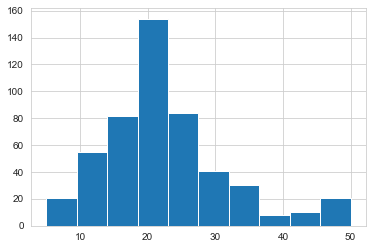

In [5]:
plt.figure()
boston_data.MEDV.hist();

Does not look normal due to that right tail. Let's try to verify statistically:

In [6]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [7]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

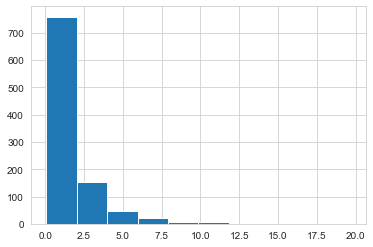

In [8]:
data = plot_exponential_data()

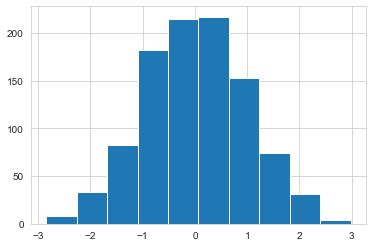

In [9]:
plt.figure()
plt.hist(np.log(data));

**Apply transform to Boston data:**

In [10]:
log_medv = np.log(boston_data.MEDV)

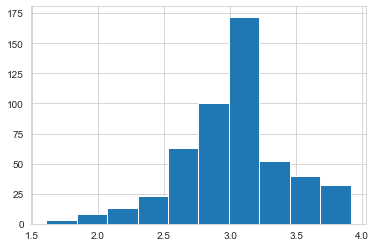

In [11]:
plt.figure()
log_medv.hist();

In [12]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

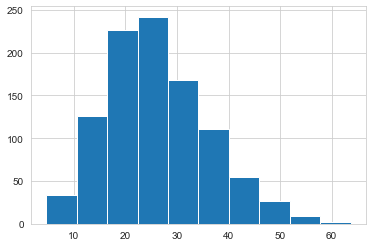

In [14]:
data = plot_square_normal_data()

Slightly skewed right.

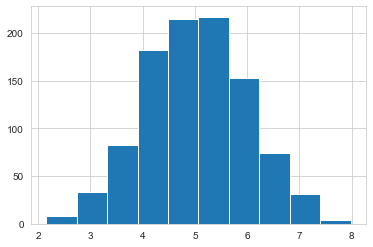

In [15]:
plt.figure()
plt.hist(np.sqrt(data));

Apply the square root transformation to the Boston data target and test whether the result is normally distributed.

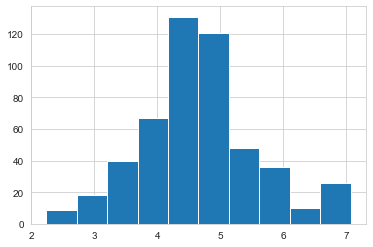

In [18]:
# your code here
sqrt_medv = np.sqrt(boston_data.MEDV)

plt.figure()
sqrt_medv.hist();

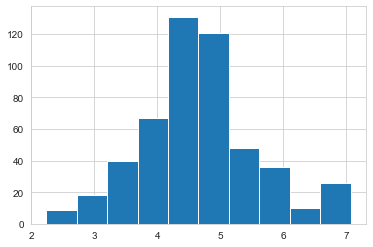

In [21]:
# Instructor Solution
sqrt_medv = np.sqrt(boston_data.MEDV)

plt.figure()
plt.hist(sqrt_medv);
# plt.grid(which='both')

In [22]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [23]:
from scipy.stats import boxcox

In [24]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [25]:
lam

0.2166209012915364

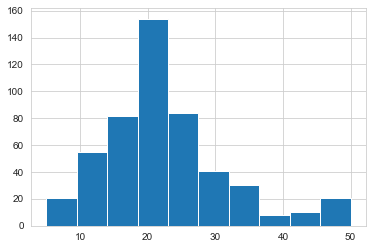

In [26]:
plt.figure()
boston_data['MEDV'].hist();

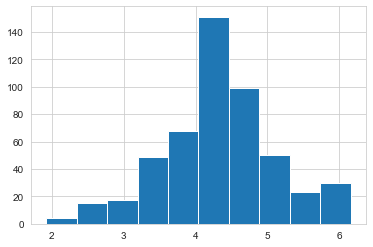

In [27]:
plt.figure()
plt.hist(boxcox_medv);

In [28]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [30]:
lr = LinearRegression()

**Reload clean version of `boston_data`:**

In [31]:
boston_data = boston_dataframe()

Same steps as before.

**Create X and y**

In [32]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Create Polynomial Features**

In [33]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [40]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.

In [41]:
# your code here
bc_result = boxcox(y_train)
y_train_boxcox = bc_result[0]
lam = bc_result[1]

In [42]:
# Instructor Solution
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [43]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [44]:
from scipy.special import inv_boxcox

In [45]:
# code from above
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [46]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [47]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!

### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Should be two lines of code.

In [48]:
# your code here
y_pred = inv_boxcox(y_pred_bc, lam2)
# r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2_score(y_test, y_pred)

0.888682959138459

In [50]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc, lam2)
r2_score(y_test, y_pred_tran)

0.888682959138459

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [51]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred, y_test)
### END SOLUTION

0.8555202098064165

---
### Machine Learning Foundation (C) 2020 IBM Corporation